# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [35]:
# Your code here
import numpy as np 

options = [1, 2, 3]
correct = int(np.random.choice(options))
player = int(np.random.choice(options))
not_chosen = [x for x in options if x != correct and x != player]
options.remove(not_chosen[0])
new_choice = [x for x in options if x != player]

correct_no_switch = 0
correct_switch = 0
probs_list_no_switch = []
probs_list_switch = []

for i in range(1,1001):
    options = [1, 2, 3]
    correct = int(np.random.choice(options))
    player = int(np.random.choice(options))
    not_chosen = [x for x in options if x != correct and x != player]
    options.remove(not_chosen[0])

    for n in range(1,3):
        if n==1 and correct == player:
            correct_no_switch += 1
        if n==2:
            new_choice = [x for x in options if x != player]
            if new_choice[0] == correct:
                correct_switch += 1
    probs_list_no_switch.append(correct_no_switch/i)
    probs_list_switch.append(correct_switch/i)

probs_list_no_switch[0:5]

[0.0, 0.5, 0.3333333333333333, 0.5, 0.6]

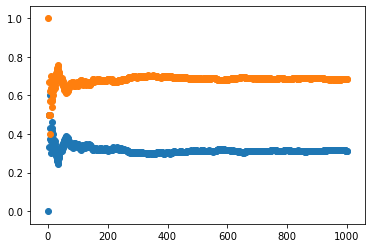

In [36]:
import matplotlib.pyplot as plt 

plt.scatter(x=range(1, 1001), y=probs_list_no_switch)
plt.scatter(x=range(1,1001), y=probs_list_switch)

In [37]:
import plotly.graph_objects as go
import numpy as np


fig = go.Figure(data=go.Scatter(x=list(range(1, 1001)), y=probs_list_no_switch, name='No Switch', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=list(range(1, 1001)), y=probs_list_switch, name='With Switch', line=dict(dash='dash')))
fig.update_layout(title='Monty Hall Problem Probability Simulation',
                    xaxis_title='Number of Attempts',
                    yaxis_title='Probability of success')
fig.show()

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 